# 依據屬性資料預測年所得是否超過US$50K/Year

## 載入相關套件

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. 載入資料集

In [22]:
df = pd.read_csv('./data/adult.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
with open('./data/adult.names', encoding='utf8') as f:
    data = f.readlines()
all_fields = []
skip_row = True
for row in data:
    if row.startswith('>50K'):
        skip_row = False
    if skip_row : continue
        
    fields=row.split(': ')
    if len(fields) == 2:
        all_fields.append(fields[0])
all_fields.append('Y')
df.columns = all_fields
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. 資料清理、資料探索與分析

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].unique())

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex
[' Male' ' Female']
native-country
[' United-States' ' Cuba' ' Jamaica' ' India' '

In [26]:
df = df.replace(' ?', None)
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 None ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' None
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' None ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' 

In [27]:
df = df.dropna()
for col in df.columns:
    if df[col].dtype == 'object':
        dict1 = {}
        for i, category in enumerate(df[col].unique()):
            dict1[category]=i
        df.loc[:, col] = df[col].map(dict1)
    df[col] = df[col].astype(int)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int32
 1   workclass       30162 non-null  int32
 2   fnlwgt          30162 non-null  int32
 3   education       30162 non-null  int32
 4   education-num   30162 non-null  int32
 5   marital-status  30162 non-null  int32
 6   occupation      30162 non-null  int32
 7   relationship    30162 non-null  int32
 8   race            30162 non-null  int32
 9   sex             30162 non-null  int32
 10  capital-gain    30162 non-null  int32
 11  capital-loss    30162 non-null  int32
 12  hours-per-week  30162 non-null  int32
 13  native-country  30162 non-null  int32
 14  Y               30162 non-null  int32
dtypes: int32(15)
memory usage: 2.0 MB


In [29]:
# 是否有含遺失值(Missing value)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Y                 0
dtype: int64

In [30]:
df.to_csv('clean_data.csv', index=False)

In [31]:
y = df.Y
X = df.drop('Y', axis=1)

## 3. 不須進行特徵工程

## 4. 資料分割

In [32]:
# 指定X，並轉為 Numpy 陣列
X = X.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24129, 14), (6033, 14), (24129,), (6033,))

## 特徵縮放

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [35]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型評估

In [36]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [37]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

82.05%


In [38]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4245  287]
 [ 796  705]]


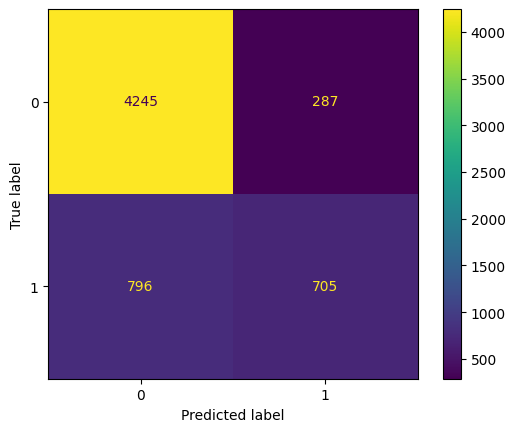

In [39]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

## 8. 模型評估，暫不進行

## 9. 模型佈署

In [40]:
# 模型存檔
import joblib

joblib.dump(clf, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib');